Optimization terminated successfully.
         Current function value: 0.290478
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4515
Method:                           MLE   Df Model:                            5
Date:                Sun, 19 Oct 2025   Pseudo R-squ.:                  0.1871
Time:                        11:56:22   Log-Likelihood:                -1313.3
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                2.156e-128
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7614      0.225    -16.701      0.000      -4.203      -3.320
age            0.0135      0.

C:\Users\anon\AppData\Local\Temp\ipykernel_5572\4282969808.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = "logit(p) = " + " + ".join([f"({coeffs[i]:.4f}*{X.columns[i]})" for i in range(len(coeffs))])


[[3925   75]
 [ 441   80]]

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.52      0.15      0.24       521

    accuracy                           0.89      4521
   macro avg       0.71      0.57      0.59      4521
weighted avg       0.85      0.89      0.86      4521



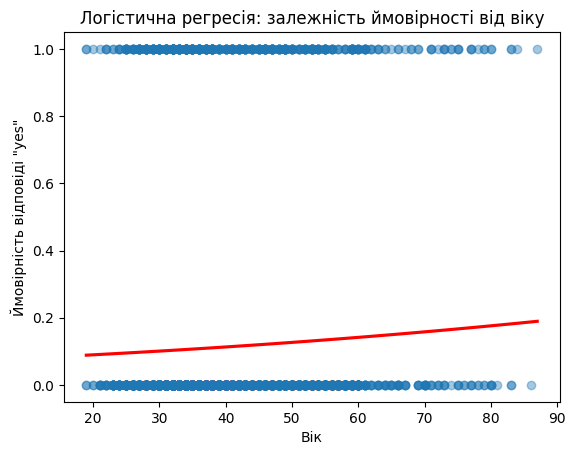


Прогноз (ймовірність відповіді 'yes') на 3 кроки вперед:
4518   0.030132
4519   0.058376
4520   0.276286
dtype: float64


In [25]:
# --- 1. Імпорт бібліотек ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

# --- 2. Завантаження даних ---
df = pd.read_csv("C:/Users/anon/Desktop/mtad/bank.csv", sep=';')

# --- 3. Кодування цільової змінної ---
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# --- 4. Вибираємо числові змінні ---
num_cols = ['age', 'balance', 'duration', 'campaign', 'previous']
X = df[num_cols]
y = df['y']

# --- 5. Додаємо константу ---
X = sm.add_constant(X)

# --- 6. Логістична регресія ---
log_model = sm.Logit(y, X).fit()
print(log_model.summary())

# --- 7. Отримаємо коефіцієнти ---
coeffs = log_model.params
equation = "logit(p) = " + " + ".join([f"({coeffs[i]:.4f}*{X.columns[i]})" for i in range(len(coeffs))])
print("\nРівняння логістичної регресії:")
print(equation)

# --- 8. Прогнози ---
y_pred_prob = log_model.predict(X)
y_pred = (y_pred_prob >= 0.5).astype(int)

# --- 9. Метрики моделі ---
# RSS та RMSE
RSS = np.sum((y - y_pred_prob)**2)
RMSE = np.sqrt(mean_squared_error(y, y_pred_prob))

# RSE (Residual Standard Error)
n = X.shape[0]        # кількість спостережень
k = X.shape[1] - 1    # кількість предикторів без константи
RSE = np.sqrt(RSS / (n - k - 1))

# Псевдо R²
R2_pseudo = log_model.prsquared

# T-статистики коефіцієнтів
t_values = log_model.tvalues

# --- Вивід метрик ---
print("\n--- Оцінки якості моделі ---")
print(f"RSS   = {RSS:.4f}")
print(f"RMSE  = {RMSE:.4f}")
print(f"RSE   = {RSE:.4f}")
print(f"R² (pseudo) = {R2_pseudo:.4f}")
print("\nT-статистики коефіцієнтів:")
print(t_values)

# --- 10. Оцінка класифікації ---
print("\nМатриця плутанини:")
print(confusion_matrix(y, y_pred))
print("\nЗвіт класифікації:")
print(classification_report(y, y_pred))

# --- 11. Візуалізація логістичної кривої за однією змінною ---
sns.regplot(x='age', y='y', data=df, logistic=True, ci=None,
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Логістична регресія: залежність ймовірності від віку')
plt.xlabel('Вік')
plt.ylabel('Ймовірність відповіді "yes"')
plt.show()

# --- 12. Прогноз на 3 кроки вперед ---
future = X.tail(3).copy()
future['age'] += [1, 2, 3]
pred_future = log_model.predict(future)
print("\nПрогноз (ймовірність відповіді 'yes') на 3 кроки вперед:")
print(pred_future)
